In [1]:
ll

total 67536
-rw-r--r--. 1 pablo.gomez.sacristan    24563 ene 12 19:05 additional_seq_info.tsv
-rw-r--r--. 1 pablo.gomez.sacristan    24558 ene 12 19:05 additional_seq_info.tsv~
-rw-r--r--. 1 pablo.gomez.sacristan 30545716 ene 12 19:05 all_ref_proteomes.faa
-rw-rw-r--. 1 pablo.gomez.sacristan  7337862 ene 12 20:04 all_ref_proteomes.faa.phr
-rw-rw-r--. 1 pablo.gomez.sacristan   707872 ene 12 20:04 all_ref_proteomes.faa.pin
-rw-rw-r--. 1 pablo.gomez.sacristan 28748758 ene 12 20:04 all_ref_proteomes.faa.psq
-rw-rw-r--. 1 pablo.gomez.sacristan     9983 ene 12 20:22 blastp_results_NP_Unk01.faa
-rw-rw-r--. 1 pablo.gomez.sacristan     1644 ene 12 20:14 blastp_results_NP_Unk01.txt
-rw-rw-r--. 1 pablo.gomez.sacristan    81699 ene 12 20:22 blastp_results_NP_Unk02.faa
-rw-rw-r--. 1 pablo.gomez.sacristan    11393 ene 12 20:14 blastp_results_NP_Unk02.txt
-rwxr-xr-x. 1 pablo.gomez.sacristan      266 ene 12 19:05 extract_seqs_from_blast_result.py*
-rw-rw-r--. 1 pablo.gomez.sacristan    30846 ene 12 20

In [29]:
# Loading trees
from ete3 import Tree
tree1 = Tree('homologs_NP_Unk01.alg.treefile')
tree2 = Tree('homologs_NP_Unk02.alg.treefile')

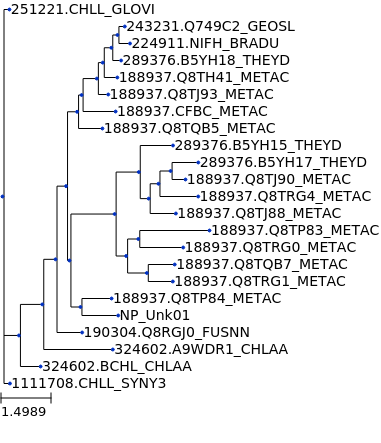

In [3]:
# Visualization of Tree 1, containing NP_Unk01
tree1.render('%%inline')

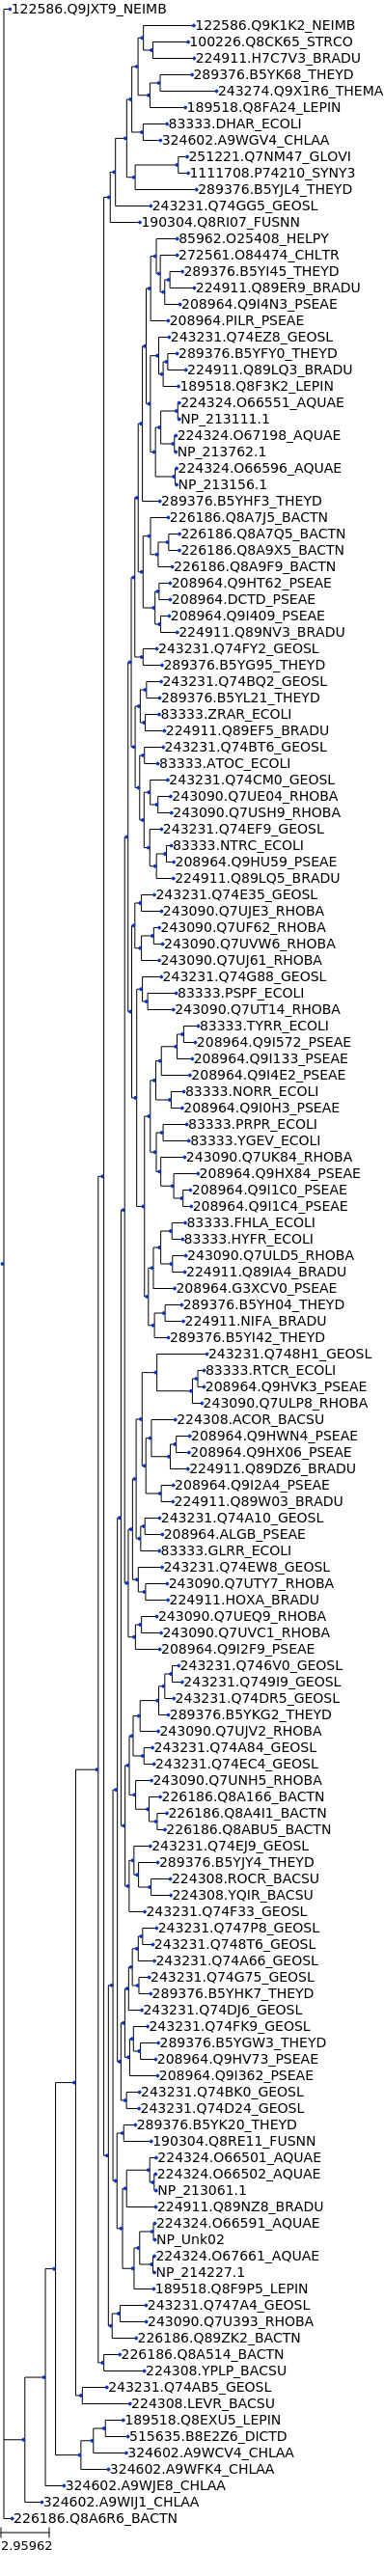

In [4]:
# Visualization of Tree2, containing NP_Unk02
tree2.render('%%inline')

In [11]:
# Relabelling trees with the additional seq info files
# Extract information
seqinfo = {}
for line in open('additional_seq_info.tsv'):
    seqname, genename, spname, lineage, gene, functionaldescription = line.strip().split("\t")
    seqinfo[seqname] = [genename, spname, lineage, functionaldescription]

In [12]:
# Checking information has been correctly extracted
print(seqinfo)

{'#seqname': ['geneName', 'sp_name', 'lineage', 'functional_description'], '243231.Q74EJ9_GEOSL': ['N/A', 'Geobacter_sulfurreducens', 'Bacteria_Proteobacteria', 'Domains REC, sigma54 interaction, HTH8'], '289376.B5YFY0_THEYD': ['ntrX', 'Thermodesulfovibrio_yellowstonii', 'Bacteria_Nitrospirae', 'Bacterial regulatory protein, Fis family'], '224324.O66551_AQUAE': ['ntrX', 'Aquifex_aeolicus', 'Bacteria_Aquificae', 'two component, sigma54 specific, transcriptional regulator, Fis family'], '190304.Q8RGJ0_FUSNN': ['N/A', 'Fusobacterium_nucleatum', 'Bacteria_Fusobacteria', '4Fe-4S iron sulfur cluster binding proteins, NifH/frxC family'], '1111708.CHLL_SYNY3': ['chlL', 'Synechocystis_sp.', 'Bacteria_Terrabacteria group', 'Component of the dark-operative protochlorophyllide reductase (DPOR) that uses Mg-ATP and reduced ferredoxin to reduce ring D of protochlorophyllide (Pchlide) to form chlorophyllide a (Chlide). This reaction is light-independent. The L component serves as a unique electron do

In [30]:
# Relabeling tree1
for leafnode in tree1:
    seqname = leafnode.name
    #print(seqname)
    if seqname == "NP_Unk01":
        leafnode.img_style['fgcolor'] = "green"
        leafnode.img_style['size'] = 10
    else: 
        genename, spname, lineage, functionaldescription = seqinfo[seqname]
        leafnode.name = "%s %s %s %s" %(genename, spname, lineage, functionaldescription)

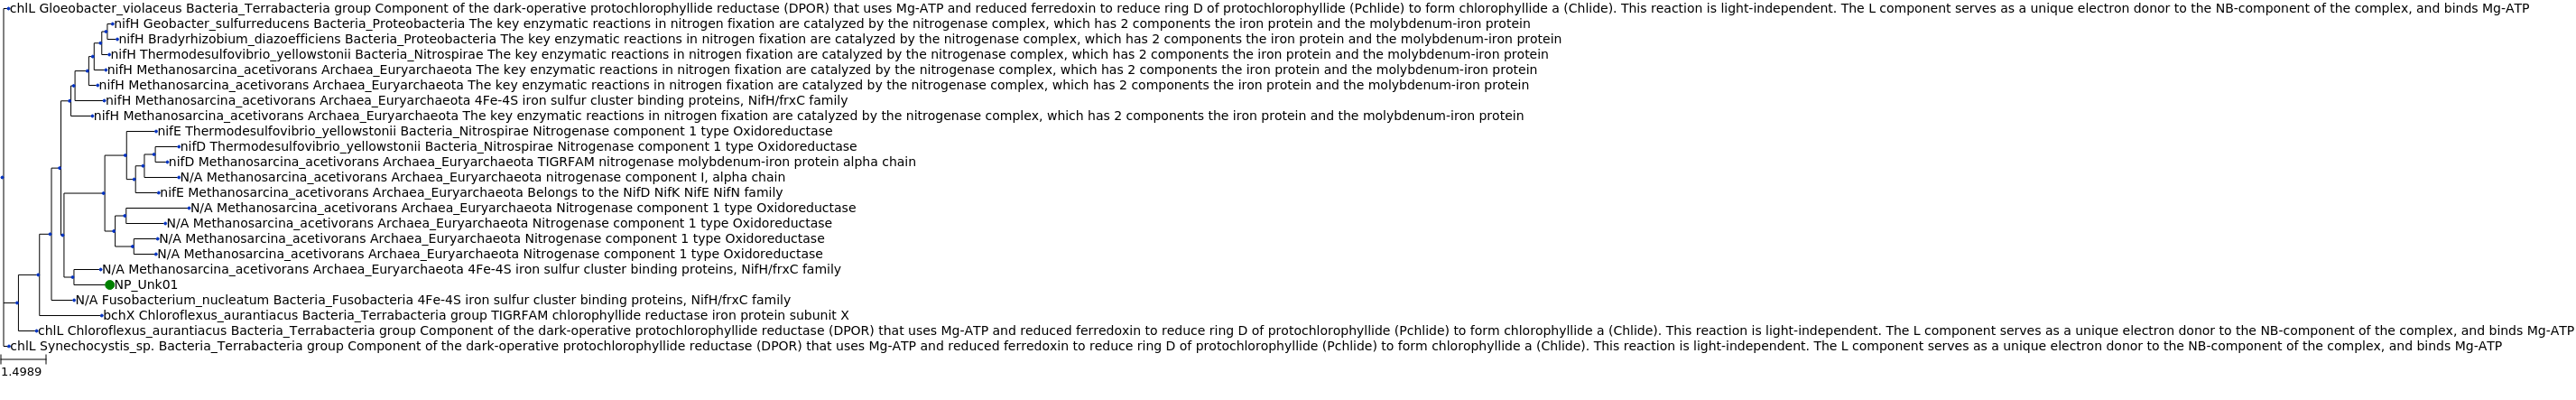

In [31]:
# Visualizing relabeled tree 1
tree1.render('%%inline')

In [32]:
# Relabeling tree2
for leafnode in tree2:
    seqname = leafnode.name
    #print(seqname)
    if seqname == "NP_Unk02":
        leafnode.img_style['fgcolor'] = "green"
        leafnode.img_style['size'] = 10
    else: 
        genename, spname, lineage, functionaldescription = seqinfo[seqname]
        leafnode.name = "%s %s %s %s" %(genename, spname, lineage, functionaldescription)

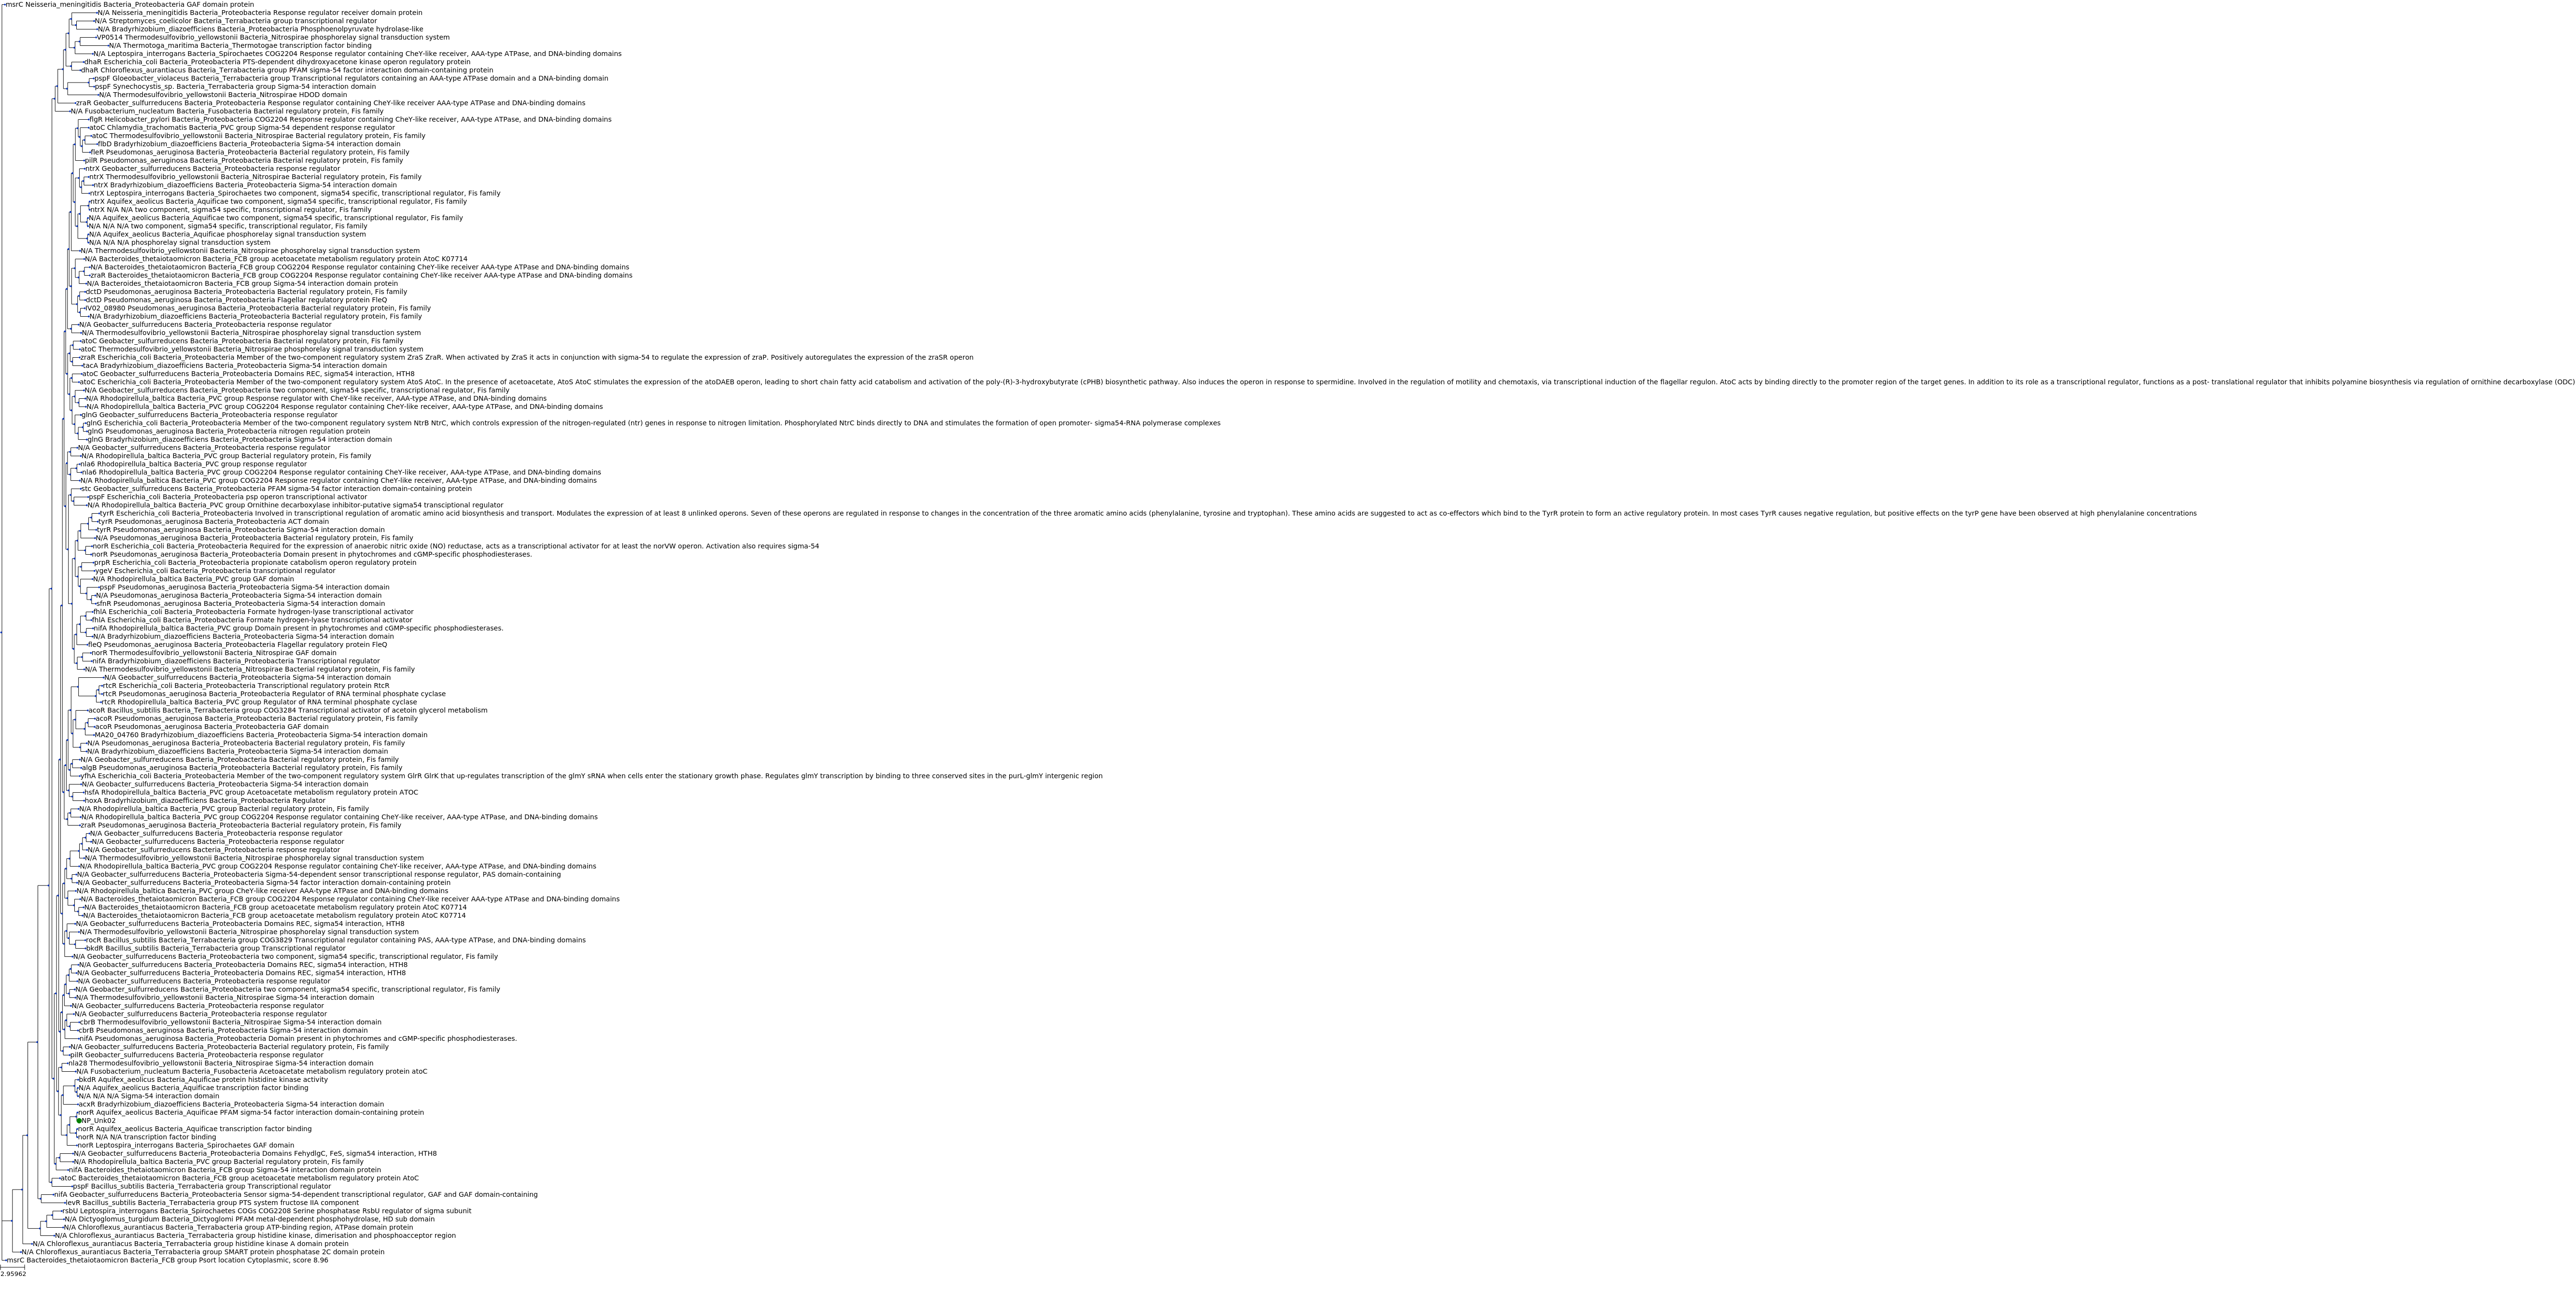

In [33]:
tree2.render('%%inline')